In [1]:
#Step1: Importing necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Step2: Mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Step3: Data Preprocessing and Cleaning for Turbidity Dataset.

import pandas as pd
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Engg680_Project2024_Group15/dataset/Turbidity_cleaned data.csv')
# Clean the 'Sample Date' column by stripping spaces
data['Sample Date'] = data['Sample Date'].str.strip()
# Convert the 'Sample Date' column to datetime
# Adjust the format if you know it (e.g., '%m/%d/%Y' for MM/DD/YYYY)
data['Sample Date'] = pd.to_datetime(data['Sample Date'], errors='coerce')
# Check for invalid dates
if data['Sample Date'].isna().any():
  print("Warning: Some dates could not be parsed. Check these rows:")
  print(data[data['Sample Date'].isna()])
# Drop rows with invalid dates
data.dropna(subset=['Sample Date'], inplace=True)
# Set 'Sample Date' as the index
data.set_index('Sample Date', inplace=True)

In [4]:
#Step4: Extracting and Cleaning the Numeric Column
data = data['Numeric Result'].dropna()

In [5]:
# Step 5: Generating Lagged Features for Supervised Learning

def create_lagged_features(data, n_lags=12):
    df = pd.DataFrame(data)
    for lag in range(1, n_lags + 1):
        df[f'lag_{lag}'] = df['Numeric Result'].shift(lag)
    df.dropna(inplace=True)
    return df

n_lags = 12
data_lagged = create_lagged_features(data, n_lags)

In [6]:
# Step6: Data Splitting and Training a Random Forest Model
# Split the data into features and target
X = data_lagged.drop(columns='Numeric Result')
y = data_lagged['Numeric Result']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
# Step7: Model Prediction and RMSE Evaluation
# Make predictions
y_pred = rf.predict(X_test)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 25.47


In [8]:
# Step8: Forecasting Future Values Using Random Forest
#Forecasting the next 6 steps (e.g., for years 2025-2030)
forecast_steps = 6
last_observations = X.iloc[-1:].copy()
forecasts = []

for _ in range(forecast_steps):
    forecast = rf.predict(last_observations)[0]
    forecasts.append(forecast)
    # Update lagged features with new forecast
    last_observations = pd.DataFrame([[forecast] + last_observations.iloc[0, :-1].tolist()], columns=last_observations.columns)

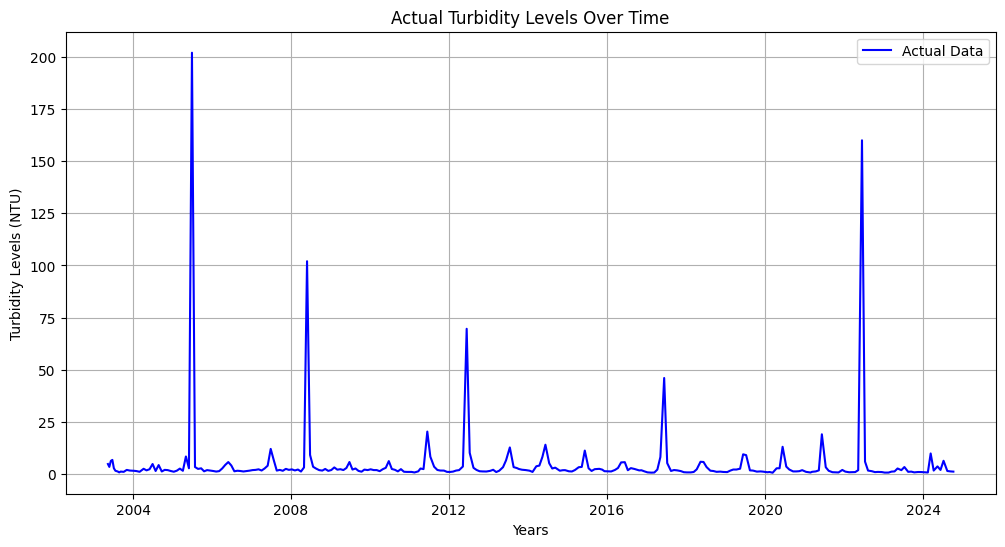

In [9]:
# Step9: Visualizing Actual Turbidity Levels Over Time

numeric_data = data.dropna()
# Plot actual data
plt.figure(figsize=(12, 6))
# Access the 'Numeric Result' values using the 'values' attribute of the numeric_data Series
plt.plot(numeric_data.index, numeric_data.values, label='Actual Data', color='blue')
plt.title("Actual Turbidity Levels Over Time")
plt.xlabel("Years")
plt.ylabel("Turbidity Levels (NTU)")
plt.legend()
plt.grid()
plt.show()

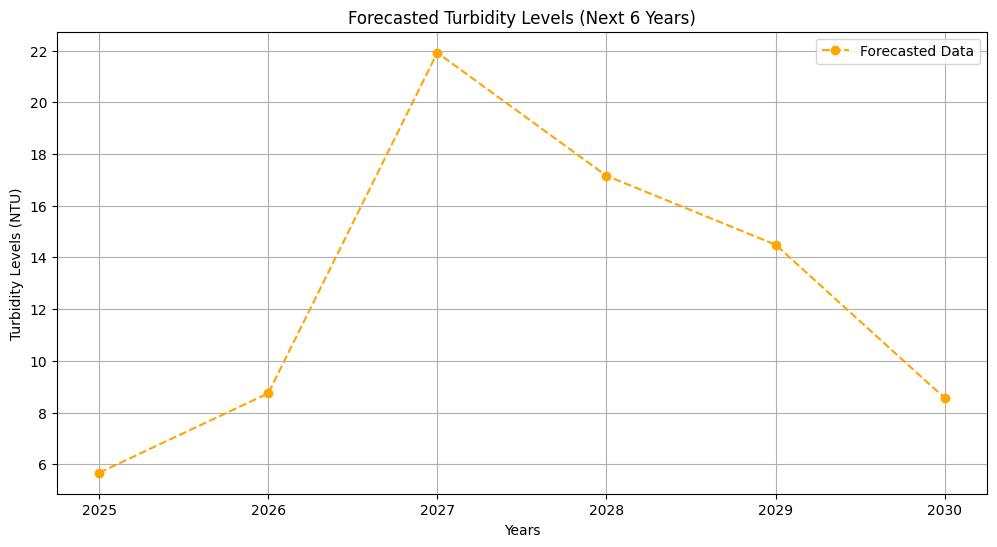

In [10]:
# Step10: Forecasting and Visualizing Future Turbidity Levels
# Adjust forecast index for 6 years
forecast_index = pd.date_range(start=numeric_data.index[-1] + pd.offsets.YearBegin(1), periods=6, freq='YS')

# Initialize inputs for the forecast
last_observation = pd.DataFrame(numeric_data[-n_lags:].values.reshape(1, -1), columns=X.columns)
forecasts = []

# Iteratively predict for the next 6 years
for i in range(6):
    prediction = rf.predict(last_observation)[0]
    forecasts.append(prediction)

    # Update last_observation as a DataFrame (no np.roll)
    last_observation = last_observation.shift(1, axis=1).fillna(prediction)

# Plot forecasted data
plt.figure(figsize=(12, 6))
plt.plot(forecast_index, forecasts, label='Forecasted Data', color='orange', linestyle='--', marker='o')
plt.title("Forecasted Turbidity Levels (Next 6 Years)")
plt.xlabel("Years")
plt.ylabel("Turbidity Levels (NTU)")
plt.legend()
plt.grid()
plt.show()

In [13]:
#Step11: Data Preprocessing, Feature Engineering, and Training Random Forest for DO Dataset
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Engg680_Project2024_Group15/dataset/DO_cleaned.csv')  # Example for turbidity, repeat for other parameters
data['Sample Date'] = pd.to_datetime(data['Sample Date'])
data.set_index('Sample Date', inplace=True)
# Keep only the numeric column
data = data['Numeric Result'].dropna()
# Create lagged features for supervised learning
def create_lagged_features(data, n_lags=12):
    df = pd.DataFrame(data)
    for lag in range(1, n_lags + 1):
        df[f'lag_{lag}'] = df['Numeric Result'].shift(lag)
    df.dropna(inplace=True)
    return df

n_lags = 12
data_lagged = create_lagged_features(data, n_lags)
# Split the data into features and target
X = data_lagged.drop(columns='Numeric Result')
y = data_lagged['Numeric Result']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)